# First representation of optimization problem

In [1]:
import cvxpy as cp

x1 = cp.Variable()
x2 = cp.Variable()
f = cp.Minimize((1/2)*x1**2 + 4*x2**2 - 32*x2 + 60)
constrains = [x1 + x2 <= 6, 
             x1 + 2 * x2 <= 8,
             x1 >= 0, x2 >= 0, x2 <= 9]

prob = cp.Problem(f, constrains)
result = prob.solve()

print("The min value of the function with constrains:", result)
print("The optimal values for x:", x1.value, x2.value)

The min value of the function with constrains: -4.0
The optimal values for x: -1.944102834068013e-24 3.9999999999999996


# Second representation of optimization problem

In [2]:
import numpy as np

H = np.array([[1, 0], [0, 8]])
c = np.array([0, -32])
c0 = 60
A = np.array([[1, 1], [1, 2], [-1, -1], [0, 1]])
b = np.array([6, 8, 0, 9])


x = cp.Variable(2)
f = cp.Minimize((1/2)*cp.quad_form(x, H) + c @ x + c0)
constrains = [A @ x <= b]

prob = cp.Problem(f, constrains)
result = prob.solve()

print("The min value of the function with constrains:", result)
print("The optimal values for x:", x.value[0], x.value[1])

The min value of the function with constrains: -4.0
The optimal values for x: 0.0 4.0


As we can see solutions are the same

# Visualization

## Domain visualization

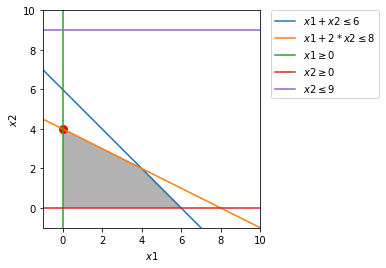

In [3]:
import matplotlib.pyplot as plt

d = np.linspace(0, 20, 300)
x1, x2 = np.meshgrid(d,d)
plt.imshow( ((x1 + x2 <=6) & (x1 + 2*x2<=8) & (x1>=0) & (x2>=0) & (x2<=9)).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(), x2.max()),origin="lower", cmap="Greys", alpha = 0.3);

x1 = np.linspace(-1, 10, 100)

# Plot the lines defining the constraints
plt.plot(x1, 6 - x1, label=r'$x1+x2\leq6$')
plt.plot(x1, (8 -x1)/2, label=r'$x1+2*x2\leq8$')
plt.plot(np.zeros_like(x1), x1, label=r'$x1\geq0$')
plt.plot(x1, np.zeros_like(x1), label=r'$x2\geq0$')
plt.plot(x1, 9*np.ones_like(x1), label=r'$x2\leq9$')
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

# Plot a solution 
plt.scatter(x.value[0], x.value[1], color='r', linewidth=3, label='solution');


## Cost function vizualization

-4.0


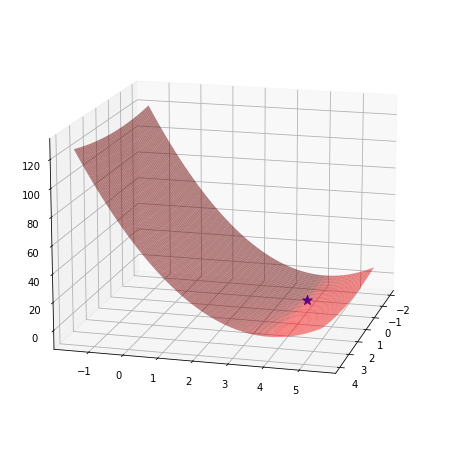

In [4]:
plt.rcParams["figure.figsize"] = (10,8)

xx = np.linspace(-2,4,100)
yy= np.linspace(-1.5,5.5,100)

X,Y = np.meshgrid(xx,yy)
Z= 1/2*X**2 + 4 * Y**2 - 32 * Y + c0
tz= 1/2*x.value[0]**2 + 4 * x.value[1]**2 - 32 * x.value[1] + c0
print(tz)

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, color='r', alpha=0.5)
ax.scatter([x.value[0]], [x.value[1]], [tz],s=100, marker="*", color='blue')
ax.view_init(15,15)
plt.show()